##Import Module

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

##Load the Dataset

In [7]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/data/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
paths[:5]

['/content/drive/MyDrive/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_burn_ps.wav',
 '/content/drive/MyDrive/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bath_ps.wav',
 '/content/drive/MyDrive/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_beg_ps.wav',
 '/content/drive/MyDrive/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_chain_ps.wav',
 '/content/drive/MyDrive/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bone_ps.wav']

In [9]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

##Make Data Frame

In [10]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/data/TESS Toronto emoti...,ps
1,/content/drive/MyDrive/data/TESS Toronto emoti...,ps
2,/content/drive/MyDrive/data/TESS Toronto emoti...,ps
3,/content/drive/MyDrive/data/TESS Toronto emoti...,ps
4,/content/drive/MyDrive/data/TESS Toronto emoti...,ps


In [11]:
df['label'].value_counts()

disgust    800
neutral    800
ps         800
happy      800
fear       800
angry      800
sad        800
Name: label, dtype: int64

##Exploratory Data Analysis

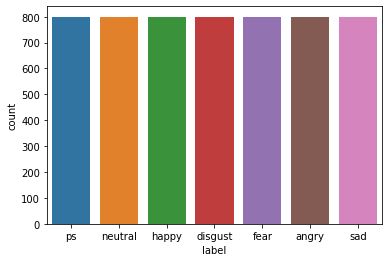

In [12]:
sns.countplot(df['label'])

##Function For Views Data

In [15]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveplot(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

##Ploting Emotion

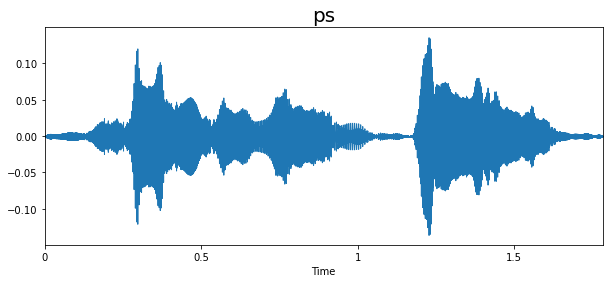

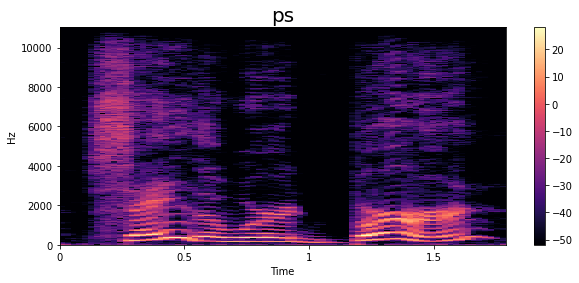

In [21]:
emotion = 'ps'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

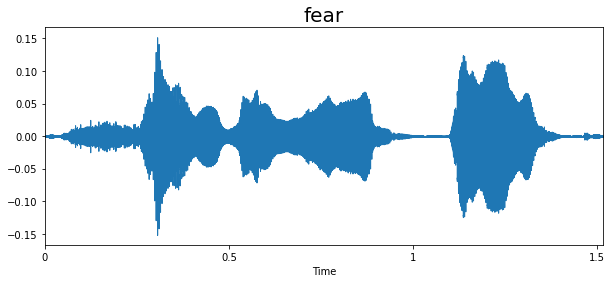

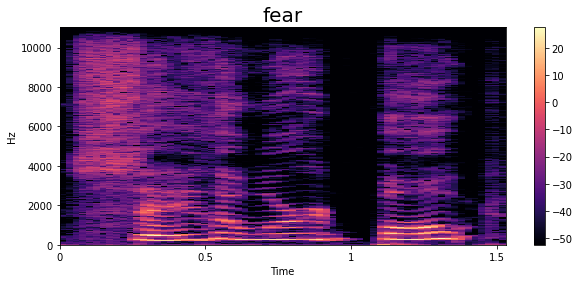

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

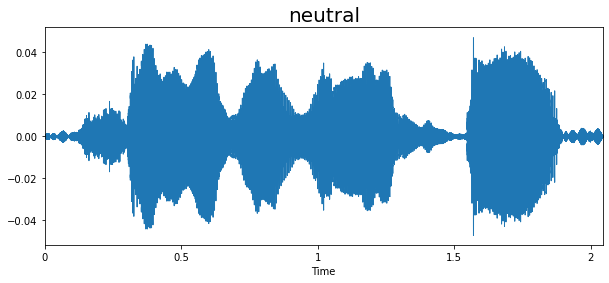

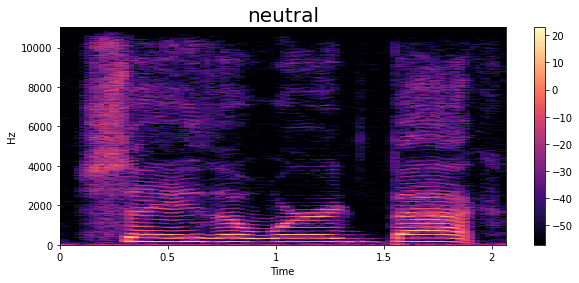

In [23]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

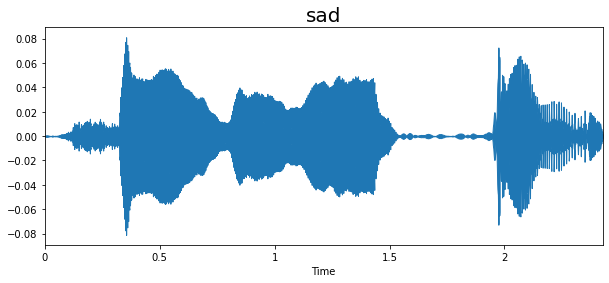

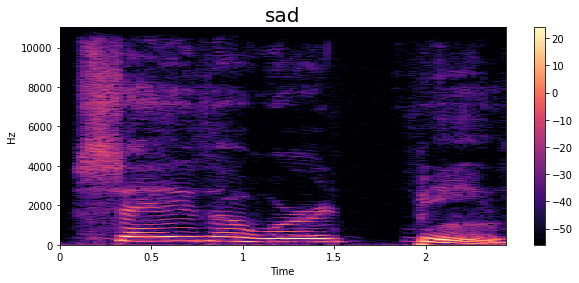

In [24]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

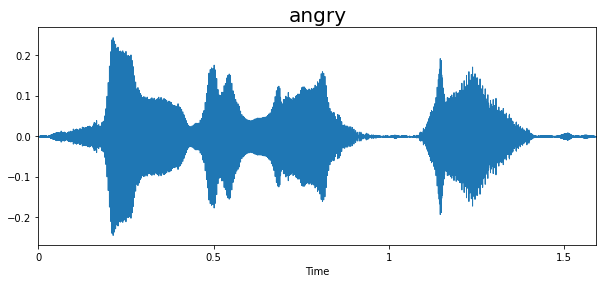

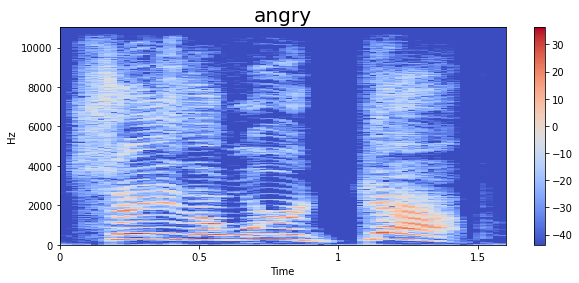

In [25]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

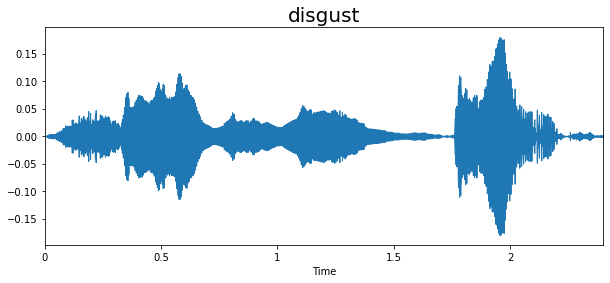

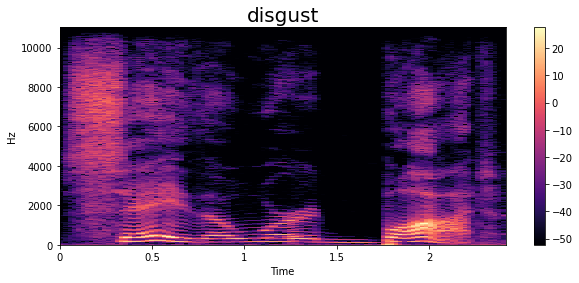

In [26]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

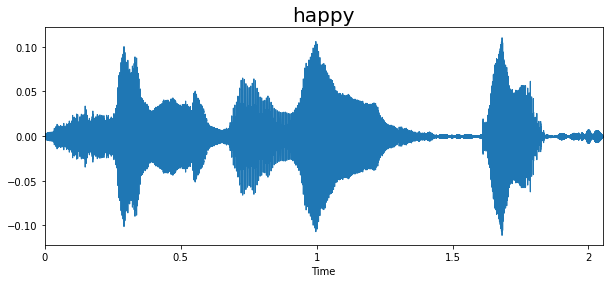

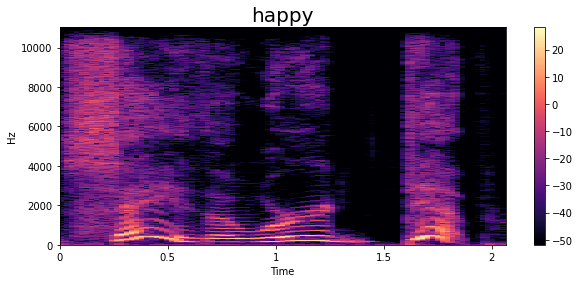

In [27]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

##Feture Extraction

In [28]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename,duration=3,offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [29]:
extract_mfcc(df['speech'][0])

array([-4.98143280e+02,  1.17247635e+02,  1.09930191e+01, -2.36732025e+01,
        2.57359385e+00,  2.21401100e+01, -1.47230234e+01, -1.71235371e+01,
       -2.09397106e+01,  1.46013284e+00, -8.54244900e+00, -1.25872908e+01,
       -1.57208133e+00,  3.43881488e+00, -3.58536100e+00,  5.80370843e-01,
       -1.84504044e+00,  7.88035631e+00,  4.68275881e+00,  5.65856636e-01,
        7.27843404e-01,  3.65549350e+00,  2.61624193e+00,  5.62169647e+00,
        6.02390431e-02,  4.02729130e+00,  3.34487653e+00,  6.17576361e+00,
        9.22646105e-01,  5.33187103e+00,  2.98839879e+00,  1.30241108e+01,
        1.61069012e+01,  1.25861788e+01,  1.65626526e+01,  5.68272161e+00,
        6.12565756e+00,  2.58140945e+00,  1.48490655e+00,  5.57890224e+00],
      dtype=float32)

In [30]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [31]:
X_mfcc

0       [-498.14328, 117.247635, 10.993019, -23.673203...
1       [-443.39322, 111.50162, 6.5638075, -17.488466,...
2       [-425.69608, 103.45517, 7.9065604, 3.6221955, ...
3       [-449.06985, 93.36319, 12.0672035, 6.0939097, ...
4       [-486.42905, 115.08622, 39.021103, 1.9006815, ...
                              ...                        
5595    [-398.94223, 116.18475, 31.46601, 23.73532, -2...
5596    [-397.96277, 68.18342, 29.452173, 24.242243, 6...
5597    [-366.33615, 106.1355, 24.270653, 31.438322, -...
5598    [-422.2284, 71.489845, 31.928364, 46.721912, 4...
5599    [-413.93106, 105.721146, 31.009756, 25.187534,...
Name: speech, Length: 5600, dtype: object

In [33]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [34]:
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [40]:
y = y.toarray()

In [37]:
y.shape

(5600, 7)

##LSTM Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
      LSTM(123,return_sequences=False,input_shape=(40,1)),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(32, activation='relu'),
      Dropout(0.2),
      Dense(7, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [41]:
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 6s 374ms/step - loss: 1.8412 - accuracy: 0.2781 - val_loss: 1.7973 - val_accuracy: 0.3196
Epoch 2/100
9/9 [==============================] - 3s 309ms/step - loss: 1.5657 - accuracy: 0.4516 - val_loss: 1.4900 - val_accuracy: 0.4500
Epoch 3/100
9/9 [==============================] - 3s 309ms/step - loss: 1.1903 - accuracy: 0.5542 - val_loss: 1.0928 - val_accuracy: 0.4964
Epoch 4/100
9/9 [==============================] - 3s 303ms/step - loss: 0.9231 - accuracy: 0.6228 - val_loss: 0.7881 - val_accuracy: 0.5839
Epoch 5/100
9/9 [==============================] - 3s 307ms/step - loss: 0.7026 - accuracy: 0.7259 - val_loss: 0.6283 - val_accuracy: 0.7089
Epoch 6/100
9/9 [==============================] - 3s 301ms/step - loss: 0.5592 - accuracy: 0.7850 - val_loss: 0.4369 - val_accuracy: 0.8562
Epoch 7/100
9/9 [==============================] - 3s 306ms/step - loss: 0.4034 - accuracy: 0.8645 - val_loss: 0.3026 - val_accuracy: 0.9125
Epoch 8/100
9

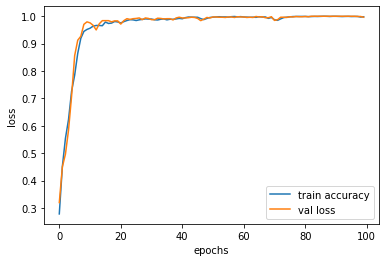

In [42]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

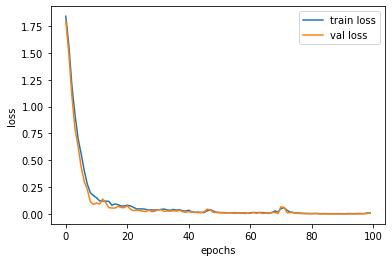

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()